In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/saisisir/Downloads/Sisir Entain Laptop/Self Learning /Machine Learning/Kaggle Practice/'
'17. Time Series Analysis/monthly_champagne.csv')

In [4]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [6]:
data['champagne'] = data ['Perrin Freres monthly champagne sales millions ?64-?72']

In [7]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72,champagne
0,1964-01,2815.0,2815.0
1,1964-02,2672.0,2672.0
2,1964-03,2755.0,2755.0
3,1964-04,2721.0,2721.0
4,1964-05,2946.0,2946.0


In [8]:
data.drop('Perrin Freres monthly champagne sales millions ?64-?72', axis = 1, inplace = True)

In [9]:
data.head()

,Month,champagne
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
data.isnull().sum()

Month        1
champagne    2
dtype: int64

In [12]:
data = data.dropna()

In [13]:
#Renaming columns
data.columns = ['Month', 'Sales']
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [14]:
#Convert half month to correct date format
data['Month'] = pd.to_datetime(data['Month'])

In [15]:
#make month column as index
data.set_index('Month', inplace=True)

In [16]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

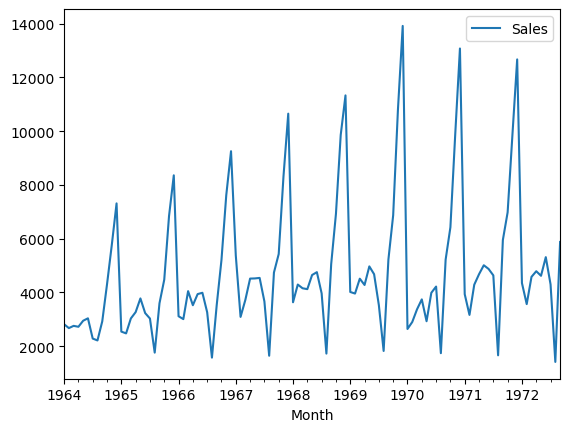

In [17]:
#Visualise the plot
data.plot()

In [19]:
#Testing for stationarity(Dickey Fuller Test)
from statsmodels.tsa.stattools import adfuller
test = adfuller(data['Sales'])

#if p value is <= 0.05, stationery else non stationary 
test[1] <= 0.05

False

In [20]:
#when we have a non stationary dataset, we perform differencing
pd.set_option('display.max_columns', None)

In [21]:
#Differencing
data['sales_first_diff'] = data['Sales'] -  data['Sales'].shift(1)
data

,Sales,sales_first_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [22]:
#But our data is stationary, we check differencing for 12 months
data['seasonal_first_diff'] = data['Sales'] -  data['Sales'].shift(12)

In [24]:
data
#check if the seasonal diff column is stationary
adfuller(data['seasonal_first_diff'].dropna())[1] <= 0.05

True

<Axes: xlabel='Month'>

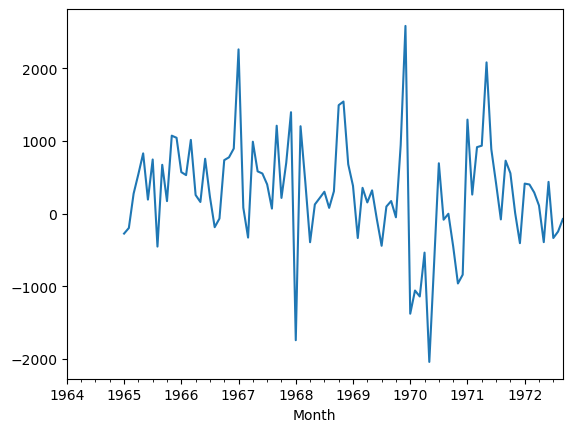

In [25]:
#since the seasonal column's p value is now True, the data is now stationary
data['seasonal_first_diff'].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

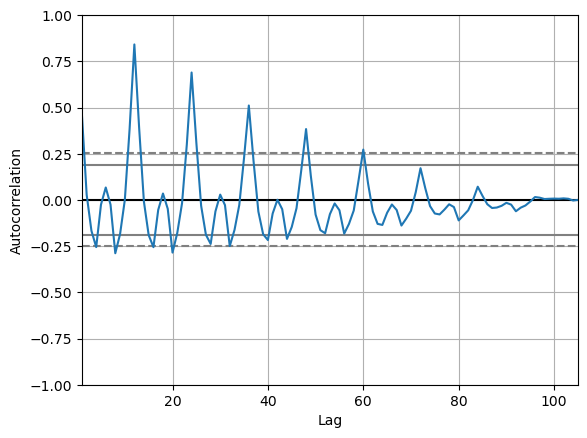

In [26]:
#AR Model
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])

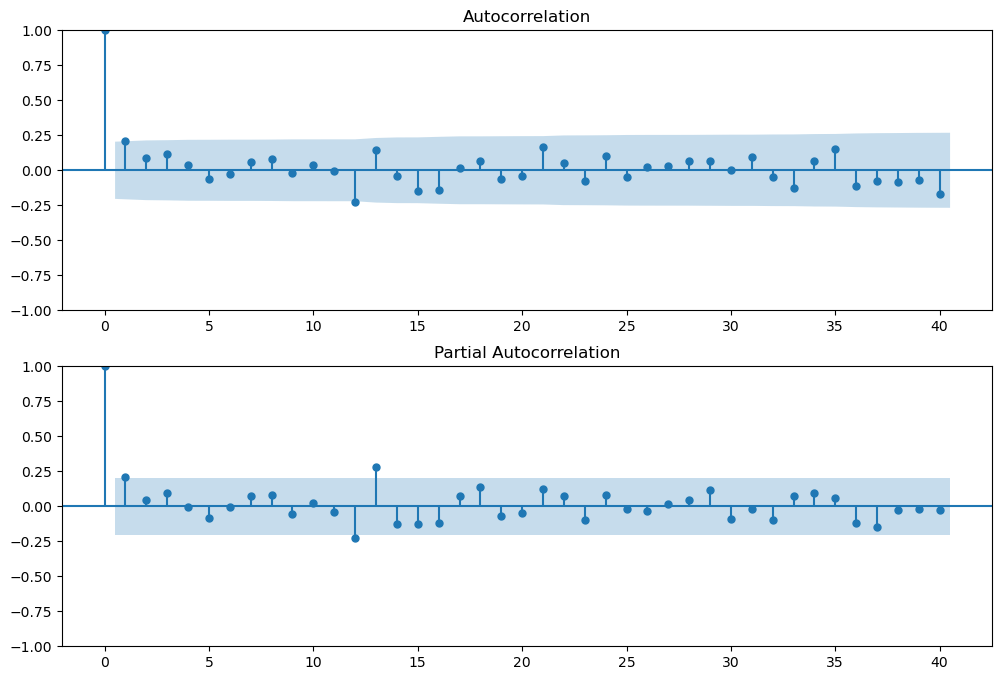

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm  # Import the statsmodels module

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['seasonal_first_diff'].iloc[13:],lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['seasonal_first_diff'].iloc[13:],lags=40,ax=ax2)